# ***TP 3*** KNN 
avce K=5 

Medjaouri Insaf - Laib Yousra 
-----------------------------

In [ ]:
#importation des bibliotheque 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importation de la data set en ligne avec la fonction fetch-openml
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
print (mnist.data.shape)
print (mnist.target.shape)
data=mnist.data
data.head()

(70000, 784)
(70000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#creat 4000 samples randomply selected 
sample = np.random.randint(60000, size=4000)
print (sample)

In [ ]:
data = mnist.data.values[sample]
target = mnist.target.values[sample]
print(data.shape)
print(target.shape)

(4000, 784)
(4000,)


Splot our data into train set and test set

In [ ]:
#train size 80 percent for train set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)
print(x_test.shape)
print(y_test.shape)

(800, 784)
(800,)


Normalazing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaller=MinMaxScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
scaller.fit(x_test)
x_test=scaller.transform(x_test)

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Model prediction and display the score 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn.score(x_test,y_test.ravel()))

0.92875


Choosing the hyper parameter K

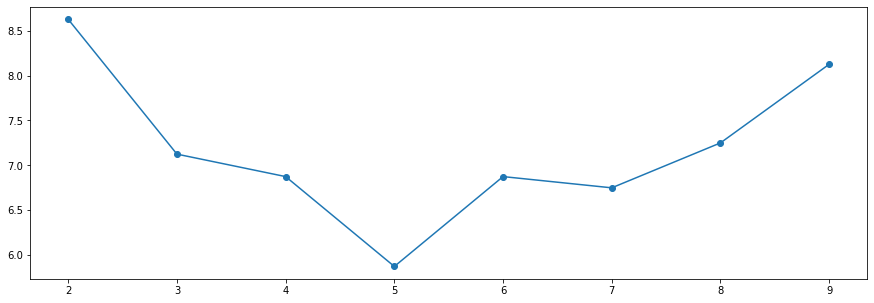

In [ ]:
errors = []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1-knn.fit(x_train, y_train.ravel()).score(x_test, y_test.ravel())))
plt.figure(figsize=(15,5))
plt.plot(range(2,10),errors, 'o-') 
plt.show()

In [ ]:
minimum = errors[0]
index=0
for i in range (0,len(errors)):
    if errors[i] < minimum:
        minimum = errors[i]
        index=i
print(f"la valeur min est: {minimum}")
print(f"la valeur de k est: {index+2}")

la valeur min est: 5.8749999999999964
la valeur de k est: 5


Making predictions

In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier()

In [ ]:
knn.score(x_test,y_test)

0.94125

In [ ]:
predicted = knn.predict(x_test)

In [ ]:
predicted.shape

(800,)

In [ ]:
predicted[0:6]

array(['2', '8', '1', '1', '0', '7'], dtype=object)

In [ ]:
images = x_test.reshape((-1,28, 28))
images.shape

(800, 28, 28)

In [ ]:
select = np.random.randint(images.shape[0], size=12)
select

array([763, 711, 472, 146, 612, 308, 387, 287, 397,  39, 542, 160])

showing the image

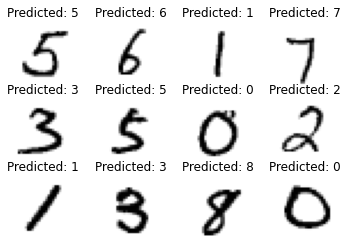

In [ ]:
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r) 
    plt.title('Predicted: {}'.format(predicted[value]) )
plt.show()


# 1.  ** cross validation**



In [ ]:
from sklearn.model_selection import cross_val_score
KNN_model=KNeighborsClassifier(n_neighbors=1)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')


array([0.9359375, 0.903125 , 0.9109375, 0.9171875, 0.9171875])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=2)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9140625, 0.89375  , 0.896875 , 0.8921875, 0.909375 ])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9265625, 0.8984375, 0.9109375, 0.915625 , 0.9171875])


# 2.   **Validation curve**



In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
k=np.arange(2,13)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3200, 784)
(3200,)


In [ ]:
KNN_model=KNeighborsClassifier()
train_score,val_score=validation_curve(KNN_model,x_train,y_train.ravel(),param_name='n_neighbors',param_range=k,cv=5,scoring='accuracy')

In [ ]:
print(val_score.mean(axis=1)
)
print(val_score.mean(axis=1).argmax()
)
print(train_score.mean(axis=1)
)
print(train_score.mean(axis=1).argmax()
)

[0.90125   0.91375   0.911875  0.9128125 0.91      0.904375  0.9065625
 0.8990625 0.8990625 0.8965625 0.8965625]
1
[0.95765625 0.96078125 0.9475     0.94421875 0.93765625 0.93234375
 0.92875    0.92320313 0.92085938 0.91789063 0.91507812]
1




# 3.  GRID search **bold text**



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': np.arange(2,11),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNN_model,param_grid,cv=5)
grid.fit(x_train,y_train.ravel())
grid.best_score_
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [ ]:
KNNmodel_best=grid.best_estimator_
KNNmodel_best.score(x_test,y_test)

0.92875



# 4.**   Matrice de confusion **




In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
matrice_confusion=confusion_matrix(y_test,KNNmodel_best.predict(x_test))

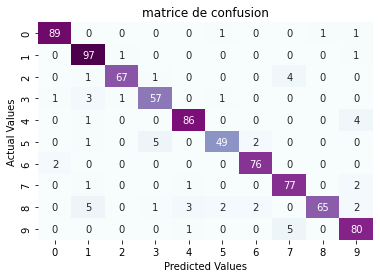

In [ ]:
sns.heatmap(matrice_confusion,annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('matrice de confusion')
plt.show()